# Classification by building an Artificial Neural Network

In this assignment you will be working with a dummy advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. you will try to create a model that will predict whether or not they will click on an ad based on the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes

* 'Age': customer age in years

* 'Area Income': Avg. Income of geographical area of consumer

* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet

* 'Ad Topic Line': Headline of the advertisement

* 'City': City of consumer

* 'Male': Whether or not consumer was male

* 'Country': Country of consumer

* 'Timestamp': Time at which consumer clicked on Ad or closed window

* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

Dataset: Advertising Dataset.csv

## Library Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import warnings
warnings.simplefilter("ignore")

## Data load and Validation

In [2]:
# Load the dataset

advertising = pd.read_csv("dataset/advertising-1.csv")
advertising.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
# Check on the data sturucture
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [4]:
# Check on the summary statistics
advertising.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [5]:
# Check whether presence of any missing values
advertising.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

There are no missing values in the dataset

## Exploratory Data Analysis

0    500
1    500
Name: Clicked on Ad, dtype: int64

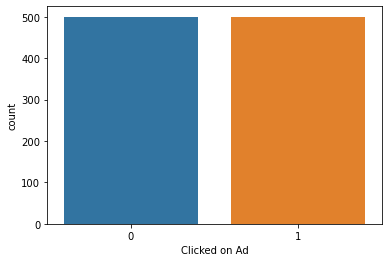

In [6]:
# Explore the response variable

sns.countplot(x = 'Clicked on Ad', data=advertising)
advertising['Clicked on Ad'].value_counts()

There are equal proportion of both response categories

<AxesSubplot:xlabel='Age', ylabel='Density'>

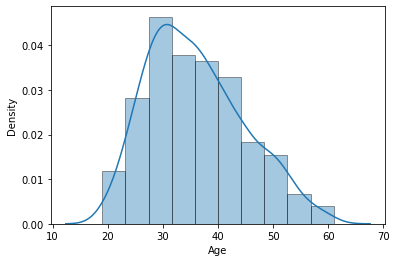

In [7]:
# Let us Explore the age variable

sns.distplot(advertising['Age'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)

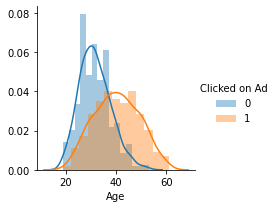

In [8]:
# If we observe the distribution of age by response variable

g = sns.FacetGrid(data=advertising, hue='Clicked on Ad')
g.map(sns.distplot, 'Age').add_legend()

The average age of individuals who have clicked on Ad is higher than the average age of individual who has not clicked on Ad

<AxesSubplot:xlabel='Area Income', ylabel='Density'>

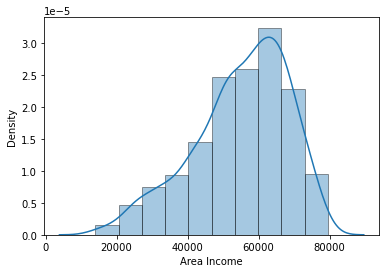

In [9]:
# Explore variable income
sns.distplot(advertising['Area Income'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)

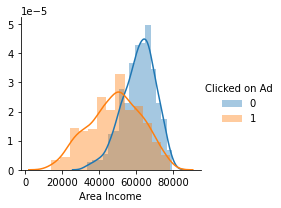

In [10]:
# We observe the distribution of income by response variable

g = sns.FacetGrid(data=advertising, hue='Clicked on Ad')
g.map(sns.distplot, 'Area Income').add_legend()

In [11]:
# Explore City and Country data

print(f"Number of Unique cities the data is collected from - {advertising['City'].nunique()}")
print(f"Number of Unique Countries the data is collected from - {advertising['Country'].nunique()}")

Number of Unique cities the data is collected from - 969
Number of Unique Countries the data is collected from - 237


In [12]:
# Convert Timestamp column to Datetime object
advertising['Timestamp'] = pd.to_datetime(advertising['Timestamp'])

In [13]:
# Extract the year and Month information from datetime

advertising['Year'] = advertising['Timestamp'].dt.year
advertising['month'] = advertising['Timestamp'].dt.month

In [14]:
# We will check the unique number of years and month
print(f"Unique number of Years - {advertising['Year'].unique()}")
print(f"Unique months in the advertising dataset - {advertising['month'].unique()}")

Unique number of Years - [2016]
Unique months in the advertising dataset - [3 4 1 6 5 7 2]


<AxesSubplot:xlabel='month', ylabel='count'>

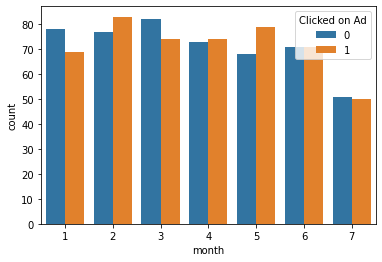

In [15]:
# We would see the distribution of the response variable with respect to Month

sns.countplot(x='month', hue='Clicked on Ad', data=advertising)

We see the proportion of clicked vs non-clicked is not significantly different across months

### Exploration of the Text Column - "Ad Topic Line"

#### One of the approach to explore this column is to apply NLP based text modelling approach - Latent Drichilet Allocation to divide each of the Ad Topic Line into a distinct "n" number of topics and then apply that distinct topic column for further classification

We would want to ignore certain words which are common across almost all of the documents, this is in order to have the 
**LDA identify the topics correctly**

This says we ignore words which are present across 95% of the documents and ignore words which are present in less than 2 documents, which means for a word to be considered, it has to be present in atleast 2 documents


In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
# Now we will apply the count vectorizer and generate a document term matrix
dtm = cv.fit_transform(advertising['Ad Topic Line'])

# Check the dtm
dtm

<1000x330 sparse matrix of type '<class 'numpy.int64'>'
	with 3780 stored elements in Compressed Sparse Row format>

Now we will run the LDA

In [17]:
from sklearn.decomposition import LatentDirichletAllocation

# We will select 3 distinct topics
LDA = LatentDirichletAllocation(n_components=3, random_state=101)
# This can take a while, we are dealing with large number of documents here
LDA.fit(dtm)

LatentDirichletAllocation(n_components=3, random_state=101)

In [18]:
# get a random feature name
cv.get_feature_names()[220]

'orchestration'

In [19]:
# Now we will attach the topic numbers to the original articles

# In order to do this, we would need to apply the transform method on our LDA model and DTM to associate the topic to each
# article
topic_results = LDA.transform(dtm)

# Now we will check the shape
topic_results.shape

(1000, 3)

In [20]:
# Now we will setup a loop which will print out the top 10 words with highest probabilities for each of the decided topics
for index, topic in enumerate(LDA.components_):
    print(f"THE TOP 10 WORDS FOR TOPIC #{index}")
    print([cv.get_feature_names()[index] for index in topic.argsort()[-10:]])
    print("\n")

THE TOP 10 WORDS FOR TOPIC #0
['enabled', 'group', 'desk', 'driven', 'zero', 'customer', 'client', 'open', 'based', 'focused']


THE TOP 10 WORDS FOR TOPIC #1
['versatile', 'graphical', 'state', 'directional', 'asynchronous', 'time', 'configurable', 'interface', 'user', 'multi']


THE TOP 10 WORDS FOR TOPIC #2
['polarized', 'enhanced', 'intangible', 'monitored', '5thgeneration', 'secured', 'face', 'solution', 'line', 'oriented']




In [21]:
# Associating topic to each of the documents

advertising['Ad_Topic'] = topic_results.argmax(axis=1)

advertising.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Year,month,Ad_Topic
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,2016,3,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,2016,4,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,2016,3,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2016,1,1
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,2016,6,0


<AxesSubplot:xlabel='Ad_Topic', ylabel='count'>

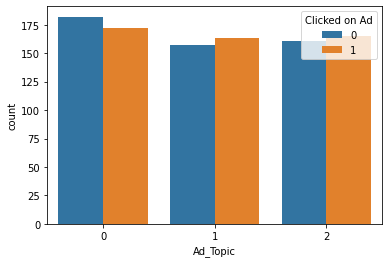

In [22]:
# We would see the distribution of the response variable with respect to Ad_Topic

sns.countplot(x='Ad_Topic', hue='Clicked on Ad', data=advertising)

#### We see the proportion of clicked vs non-clicked is not significantly different across Topic Numbers - Essentially meanms Ad Topic Description doesnt have much impact on whether or not user will click on a Topic

<AxesSubplot:>

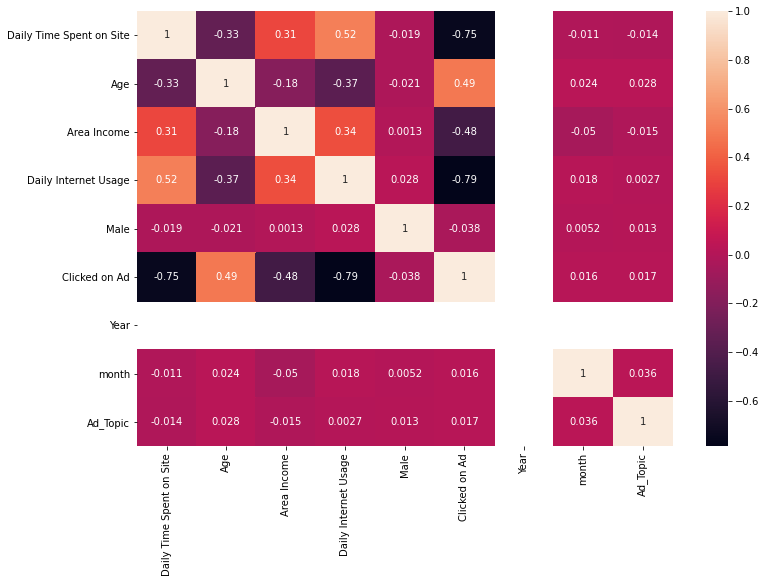

In [23]:
# We wil visualise the correlation heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(advertising.corr(), annot=True)

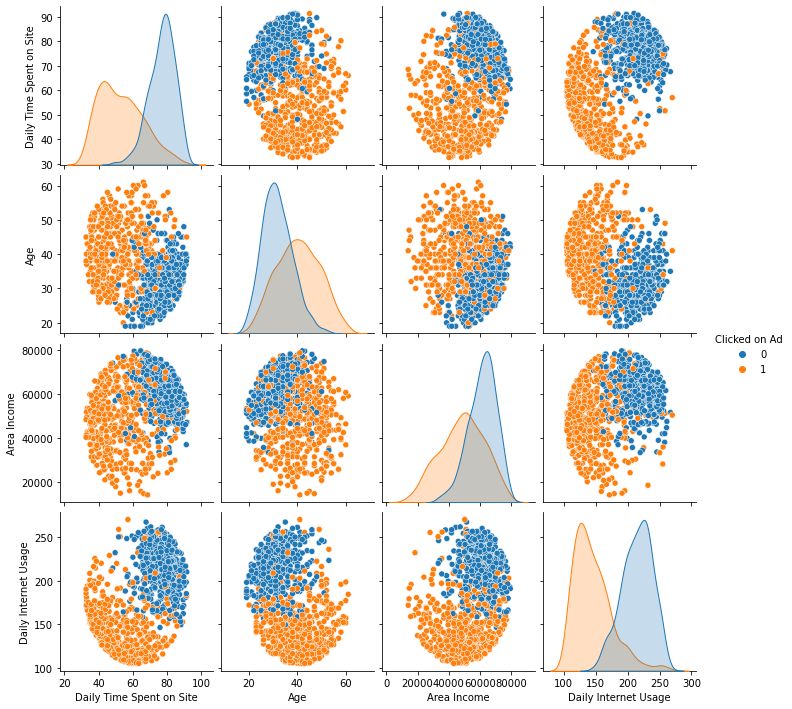

In [24]:
# We will visuaise the pair plot
sns.pairplot(data=advertising[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Clicked on Ad']], 
                                hue='Clicked on Ad')

In [25]:
advertising.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Year,month,Ad_Topic
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,2016,3,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,2016,4,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,2016,3,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2016,1,1
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,2016,6,0


## Train-Test Split and Feature Scaling

#### Seggregate features and target

We would not be using the columns like 
- Ad Topic Line (This being a text column)
- Also Ad_Topic Numbers as we see it is not significant through LDA before
- Country (There are 263 unique countries and hence not of much relevance)
- City (There are over 900+ cities and hence not of much relevance)
- Year (Its all for 2016 and hence not of much relevance)
- Month (We see the proportion of Cliked on Ad vs Non-clicked on Ad is not significantly different across months, hence dropping this variable, anticipating not of much relevance)

In [26]:
features = advertising[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
target = advertising['Clicked on Ad']

In [27]:
# perform feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

features = sc.fit_transform(features)

In [28]:
# splitting the dataset into training and test - Train, Validation, Test

from sklearn.model_selection import train_test_split

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, 
                                                                            random_state=101)

# We will further split the training set into validatoion to evaluate the Neural Network training
features_train, features_val, target_train, target_val = train_test_split(features_train, target_train, test_size=0.3, 
                                                                            random_state=101)

## Build the ANN and Run Predictions

In [29]:
# import the libraries
# We will use the keras library inside tensorflow

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [30]:
# Initialize the ANN. Input (5), Hidden (3), Output (1/0) - AVG(NUM OF INPUT, NUMBER OF OUTPUT)

classifier = Sequential()

# Adding the input layer and the first hidden layer of the neural network
classifier.add(Dense(activation='relu', input_dim=5, units=3, kernel_initializer='uniform'))

# Adding the output layer
classifier.add(Dense(activation='sigmoid', units=1, kernel_initializer='uniform'))

# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# View the structure of the model
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 18        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Fitting the ANN to the training set

model = classifier.fit(features_train, target_train, batch_size=10, epochs=100, validation_data=(features_val, target_val))

Epoch 1/100
49/49 [==============================] - 0s 3ms/step - loss: 0.6907 - accuracy: 0.5143 - val_loss: 0.6876 - val_accuracy: 0.4905
Epoch 2/100
49/49 [==============================] - 0s 878us/step - loss: 0.6789 - accuracy: 0.7245 - val_loss: 0.6674 - val_accuracy: 0.9095
Epoch 3/100
49/49 [==============================] - 0s 886us/step - loss: 0.6444 - accuracy: 0.9653 - val_loss: 0.6211 - val_accuracy: 0.9381
Epoch 4/100
49/49 [==============================] - 0s 880us/step - loss: 0.5866 - accuracy: 0.9633 - val_loss: 0.5578 - val_accuracy: 0.9619
Epoch 5/100
49/49 [==============================] - 0s 880us/step - loss: 0.5175 - accuracy: 0.9633 - val_loss: 0.4884 - val_accuracy: 0.9571
Epoch 6/100
49/49 [==============================] - 0s 889us/step - loss: 0.4472 - accuracy: 0.9633 - val_loss: 0.4238 - val_accuracy: 0.9571
Epoch 7/100
49/49 [==============================] - 0s 920us/step - loss: 0.3837 - accuracy: 0.9633 - val_loss: 0.3663 - val_accuracy: 0.9571
E

In [32]:
# Examine the keys in the Neural Network Model Object
for key in model.history.keys():
    print(key)

loss
accuracy
val_loss
val_accuracy


### Plot Training Loss vs Validation Loss and Training Accuracy vs Validation Accuracy

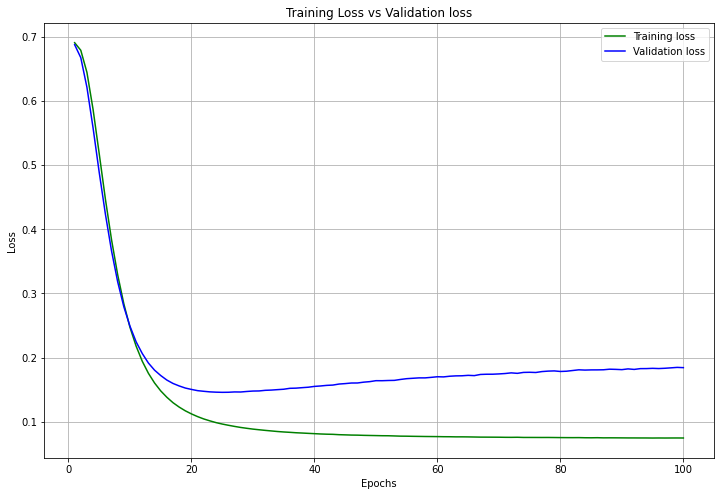

In [33]:
plt.figure(figsize=(12, 8))

loss_train = model.history['loss']
loss_val = model.history['val_loss']

epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training Loss vs Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

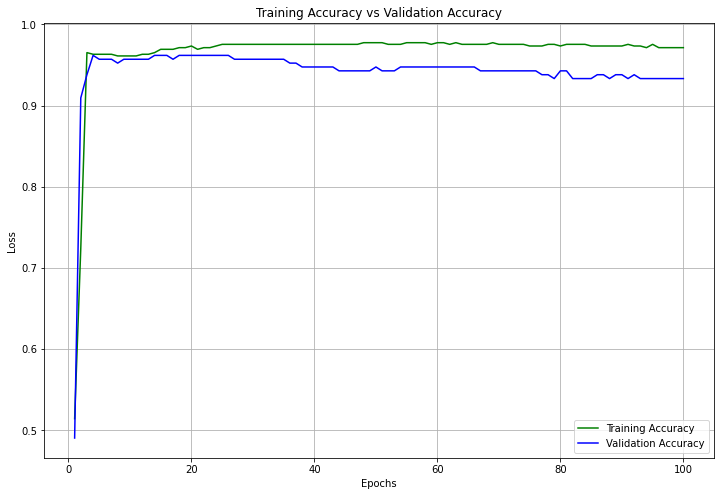

In [34]:
plt.figure(figsize=(12, 8))

loss_train = model.history['accuracy']
loss_val = model.history['val_accuracy']

epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training Accuracy')
plt.plot(epochs, loss_val, 'b', label='Validation Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

#### We see beyond 40-50 epochs, the Validation Loss is increasing and Validation Accuracy is decreasing. This is suggestive of overfitting
#### We will implement L1 Regularization (Dropout) in the hidden layer to see whether we can improve this situation

In [35]:
from tensorflow.keras.layers import Dropout

# Rebuild the Model
classifier = Sequential()
classifier.add(Dense(activation='relu', input_dim=5, units=3, kernel_initializer='uniform'))
# Adding the Dropout - 1 out of 3 nodes in the hidden layer will be randomly excluded in each of the update cycle
classifier.add(Dropout(rate=0.33))
# Adding the output layer
classifier.add(Dense(activation='sigmoid', units=1, kernel_initializer='uniform'))

# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# View the structure of the model
classifier.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 3)                 18        
_________________________________________________________________
dropout (Dropout)            (None, 3)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


In [36]:
model = classifier.fit(features_train, target_train, batch_size=10, epochs=100, validation_data=(features_val, target_val))

Epoch 1/100
49/49 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.7224 - val_loss: 0.6869 - val_accuracy: 0.9524
Epoch 2/100
49/49 [==============================] - 0s 763us/step - loss: 0.6778 - accuracy: 0.9184 - val_loss: 0.6645 - val_accuracy: 0.9286
Epoch 3/100
49/49 [==============================] - 0s 889us/step - loss: 0.6468 - accuracy: 0.9122 - val_loss: 0.6269 - val_accuracy: 0.9333
Epoch 4/100
49/49 [==============================] - 0s 855us/step - loss: 0.6054 - accuracy: 0.9143 - val_loss: 0.5802 - val_accuracy: 0.9333
Epoch 5/100
49/49 [==============================] - 0s 868us/step - loss: 0.5640 - accuracy: 0.9122 - val_loss: 0.5393 - val_accuracy: 0.9333
Epoch 6/100
49/49 [==============================] - 0s 885us/step - loss: 0.5272 - accuracy: 0.9061 - val_loss: 0.5004 - val_accuracy: 0.9333
Epoch 7/100
49/49 [==============================] - 0s 861us/step - loss: 0.4938 - accuracy: 0.9122 - val_loss: 0.4713 - val_accuracy: 0.9333
E

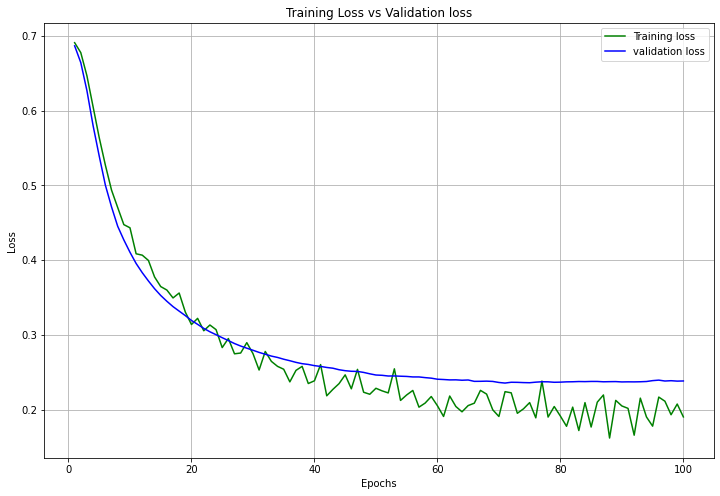

In [37]:
plt.figure(figsize=(12, 8))

loss_train = model.history['loss']
loss_val = model.history['val_loss']

epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training Loss vs Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

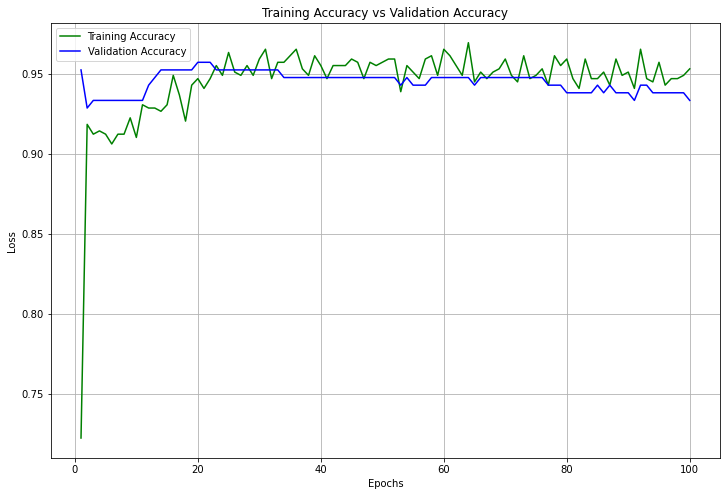

In [38]:
plt.figure(figsize=(12, 8))

loss_train = model.history['accuracy']
loss_val = model.history['val_accuracy']

epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training Accuracy')
plt.plot(epochs, loss_val, 'b', label='Validation Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

#### We see from above that without the dropout regularization, we ended up having a model with high bias and low variance, once we implemented the dropout, we ended making some corrections to the bias but resulted in a model with inreased variance... This is inline with the bias-voriance tradeoff and the final model, gets decided based on the problem domain and the what tradeoff can be made in the respective problem situation

## Run Predictions from Neural Model

In [39]:
# Predicting the test set results
target_pred = classifier.predict(features_test)

# In order to use it in Confusion Matrix
target_pred = (target_pred > 0.5)

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

print("Confusion Matrix")
print(confusion_matrix(target_test, target_pred))
print("\n")
print("Accuracy Score")
print(accuracy_score(target_test, target_pred))
print("\n")
print("F1 Score")
print(f1_score(target_test, target_pred))
print("\n")
print("Classification Report")
print(classification_report(target_test, target_pred))

Confusion Matrix
[[154   3]
 [  8 135]]


Accuracy Score
0.9633333333333334


F1 Score
0.9608540925266904


Classification Report
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       157
           1       0.98      0.94      0.96       143

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

